In [1]:
import tensorflow as tf

Train_full, Test_full = tf.keras.datasets.mnist.load_data()

2025-11-30 06:47:44.503862: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
X_train = Train_full[0][:55000].astype(float)/255
y_train = Train_full[-1][:55000].flatten()
X_val = Train_full[0][55000:].astype(float)/255
y_val = Train_full[-1][55000:].flatten()
X_test = Test_full[0].astype(float)/255
y_test = Test_full[-1].flatten()

In [4]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
early_stop_cb = tf.keras.callbacks.EarlyStopping(patience = 10)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(70, activation = 'relu'),
    tf.keras.layers.Dense(70, activation = "relu"),
    tf.keras.layers.Dense(70, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

model.compile(loss = "sparse_categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate=0.005), metrics = ["accuracy"])
model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val), callbacks = [early_stop_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8787 - loss: 0.3932 - val_accuracy: 0.9642 - val_loss: 0.1191
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9553 - loss: 0.1545 - val_accuracy: 0.9622 - val_loss: 0.1442
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9636 - loss: 0.1275 - val_accuracy: 0.9686 - val_loss: 0.1158
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9695 - loss: 0.1050 - val_accuracy: 0.9672 - val_loss: 0.1200
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9727 - loss: 0.0963 - val_accuracy: 0.9732 - val_loss: 0.1126
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9754 - loss: 0.0888 - val_accuracy: 0.9654 - val_loss: 0.1438
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9766 - loss: 0.0825 - val_accuracy: 0.9756 - val_loss: 0.1166
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9806 - loss: 0.0738 -

In [10]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9713 - loss: 0.2335


[0.19390027225017548, 0.9746999740600586]

In [3]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [4]:
class Exponential_learning(tf.keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    
    def on_batch_end(self, batch, logs = None):
        lr = self.model.optimizer.learning_rate.numpy() * self.factor
        self.model.optimizer.learning_rate = lr
        self.rates.append(lr)
        self.losses.append(logs["loss"])


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])
exp_lr = Exponential_learning(1.01)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 1, validation_data = (X_val, y_val), callbacks = [exp_lr])

/home/sanja/.pyenv/versions/3.12.10/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.4596 - loss: 75.8355 - val_accuracy: 0.1126 - val_loss: 24002.3047


In [42]:
max(exp_lr.losses)

1183.6954345703125

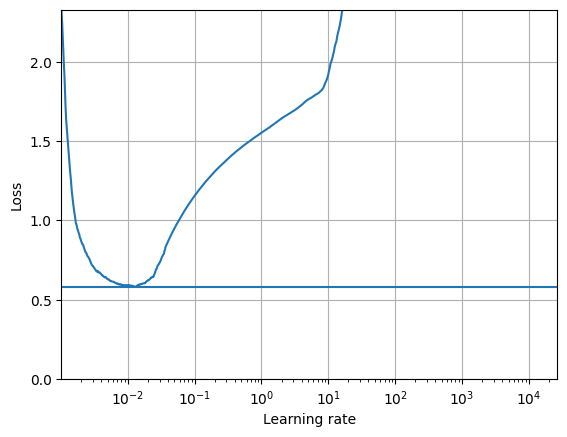

In [17]:
import matplotlib.pyplot as plt
plt.plot(exp_lr.rates, exp_lr.losses)
plt.hlines(min(exp_lr.losses), min(exp_lr.rates), max(exp_lr.rates))
plt.axis([min(exp_lr.rates), max(exp_lr.rates), 0, exp_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.xscale('log')  # Use logarithmic scale for x-axis
plt.show()

In [18]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape = [28, 28]),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(300, activation = "relu"),
    tf.keras.layers.Dense(10, activation = "softmax")
])

/home/sanja/.pyenv/versions/3.12.10/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
from pathlib import Path
run_index = 1 # increment this at every run
run_logdir = Path() / "my_mnist_logs" / "run_{:03d}".format(run_index)
run_logdir

PosixPath('my_mnist_logs/run_001')

In [20]:


early_stop = tf.keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)
tb_cb = tf.keras.callbacks.TensorBoard(run_logdir)
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=10e-3), metrics = ["accuracy"])
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_val, y_val), callbacks = [early_stop, tb_cb])

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8455 - loss: 0.5326 - val_accuracy: 0.9356 - val_loss: 0.2282
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9372 - loss: 0.2348 - val_accuracy: 0.9494 - val_loss: 0.1970
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9440 - loss: 0.2159 - val_accuracy: 0.9506 - val_loss: 0.1868
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9526 - loss: 0.1833 - val_accuracy: 0.9524 - val_loss: 0.2003
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9528 - loss: 0.1910 - val_accuracy: 0.9498 - val_loss: 0.2376
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9535 - loss: 0.1957 - val_accuracy: 0.9614 - val_loss: 0.1613
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9606 - loss: 0.1613 - val_accuracy: 0.9548 - val_loss: 0.1776
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9621 - loss: 0.160

In [21]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9564 - loss: 0.2008


[0.18987634778022766, 0.9603999853134155]

In [22]:
%load_ext tensorboard
%tensorboard --logdir = ./my_mnist_logs

ERROR: Failed to launch TensorBoard (exited with 2).
Contents of stderr:
2025-11-30 06:58:12.688269: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
usage: tensorboard [-h] [--helpfull] [--logdir PATH] [--logdir_spec PATH_SPEC]
                   [--host ADDR] [--bind_all] [--port PORT]
                   [--reuse_port BOOL] [--load_fast {false,auto,true}]
                   [--extra_data_server_flags EXTRA_DATA_SERVER_FLAGS]
                   [--grpc_creds_type {local,ssl,ssl_dev}]
                   [--grpc_data_provider PORT] [--purge_orphaned_data BOOL]
                   [--db URI] [--db_import] [--inspect] [--version_tb]
                   [--tag TAG] [--event_file PATH] [--path_prefix PATH]
                   [--window_title TEXT] [--max_reload_t